# Applying different Convolutional Neural Networks on MNIST data

 ConvNets are designed specifically for image datasets. It is inspired from Biological visual cortex.
 

# Steps followed in this assignment:-
1. Load libraries and MNIST data
2. Defing parameters 
3. Normalizing  the data
4. Convert class label values to one-hot encoded values
5. Implementing CNN with 3 Convolution layers with Kernel size of 2X2  , 5  Convolution layers with Kernel size of 5X5  and  7 Convolution layers with Kernel size of 3X3.
6. Implementing max-pooling, Padding,  Strides, Dropouts and Batch Normalization in each model.
7. Compiling the model
8. Plotting Categorical Crossentropy Loss vs Epochs plot
9. Plotting Violin plots to check weights distribution.

# 1. Loading Libraries

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## 1.1 Loading MNIST data

In [0]:
# Defing some parameters
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# Loading MNIST data
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## 1.2 Normalizing the data

In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)

# Printing to see how many data points are there for train and test and to see each image size

print("Number of Train data points :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of Test data points :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

X_train shape: (60000, 28, 28, 1)
Number of Train data points : 60000 and each image is of shape (28, 28)
Number of Test data points : 10000 and each image is of shape (28, 28)


## 1.3 Converting to One-Hot encoding

In [0]:
# Here in this dataset, class labels for each image are numbers (0,1,2,3,...), so I want to convert them into one-hot encoded vectors 

print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image with class label of 5 and convert it into one-hot encoded vector of 0's and 1's - 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion is needed for MLPs 

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# this function is used draw Categorical Crossentropy Loss vs No. of epochs plot

import numpy as np
import time

def plt_dynamic(x, vy, ty):
    plt.figure(figsize=(10,6))
    plt.plot(x, ty, 'b', label="Train Loss")
    plt.plot(x, vy, 'r', label="Validation/Test Loss")
    plt.title('\nCategorical Crossentropy Loss VS Epochs')
    plt.xlabel('Epochs') 
    plt.ylabel('Categorical Crossentropy Loss-Train and Test loss')
    plt.legend()
    plt.grid()
    plt.show()

# 2. CNN with 3 Convolution layers with Kernel size of 2X2 

## 2.1  Building the model

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# start building a model
# Initializing the sequential model as the layers are in sequential 

model_1 = Sequential()   

# Adding first Convolution layer
model_1.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
# Adding Maxpooling layer 
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout 
model_1.add(Dropout(0.25))

# Adding second Convolution layer
model_1.add(Conv2D(64, (2, 2), activation='relu'))
# Adding Batch Normalization
model_1.add(BatchNormalization())
# Adding Maxpooling layer 
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout 
model_1.add(Dropout(0.25))

# Adding third Convolution layer
model_1.add(Conv2D(128, (2, 2), activation='relu'))
# Adding Maxpooling layer 
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout 
model_1.add(Dropout(0.25))

# Adding flatten layer
model_1.add(Flatten())
# Adding a dense layer
model_1.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_1.add(BatchNormalization())
# Adding Dropout 
model_1.add(Dropout(0.5))

# Output softmax layer
model_1.add(Dense(num_classes, activation='softmax'))

# Printing model summary
model_1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_356 (Conv2D)          (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_325 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_337 (Dropout)        (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_357 (Conv2D)          (None, 12, 12, 64)        8256      
_________________________________________________________________
batch_normalization_179 (Bat (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_326 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_338 (Dropout)        (None, 6, 6, 64)          0         
__________

## 2.2 Compiling the model

In [0]:
# Compiling the model 
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
# To fit the model, give input data, batch_size, number of epochs and validation/test data
history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.5757 - acc: 0.8230 - val_loss: 0.1265 - val_acc: 0.9602
Epoch 2/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.1843 - acc: 0.9416 - val_loss: 0.0685 - val_acc: 0.9784
Epoch 3/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.1330 - acc: 0.9582 - val_loss: 0.0565 - val_acc: 0.9813
Epoch 4/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.1096 - acc: 0.9665 - val_loss: 0.0447 - val_acc: 0.9855
Epoch 5/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0992 - acc: 0.9689 - val_loss: 0.0416 - val_acc: 0.9870
Epoch 6/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.0874 - acc: 0.9729 - val_loss: 0.0396 - val_acc: 0.9873
Epoch 7/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0788 - acc: 0.9752 - val_loss: 0.041

## 2.3  Plotting the Loss vs Epoch Plot

Test score: 0.03383973254601297
Test accuracy: 0.9886


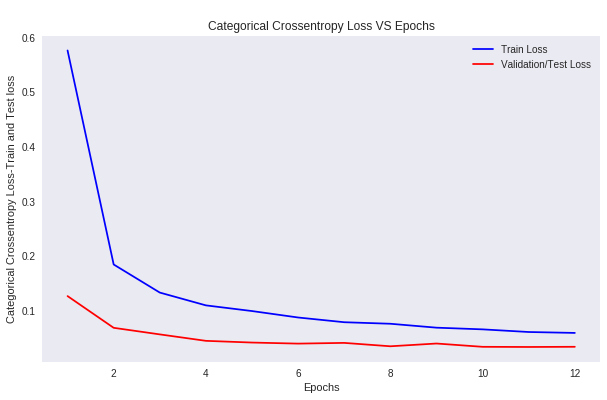

In [0]:
# Evaluating the model on test data
score_1 = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, epochs+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
vy = history.history['val_loss']

# Training loss
ty = history.history['loss']
# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

#### Observation:-
1. In this plot both Train and Test loss are significantly reducing/converging and there is no divergence / increasing between them . 
2. This means model is not overfitting and it is working well.

## 2.4  Plotting Violin plots of hidden and output layers to see weights distribution

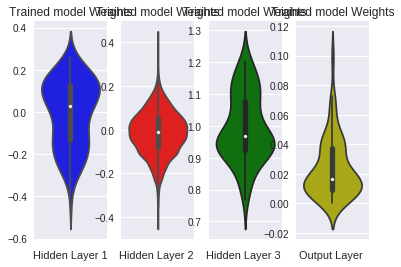

In [0]:
import seaborn as sns

w_after = model_1.get_weights()

# weights of convolution layer 1
c1_w = w_after[0].flatten().reshape(-1,1)
# weights of convolution layer 2
c2_w = w_after[2].flatten().reshape(-1,1)
# weights of convolution layer 3
c3_w = w_after[4].flatten().reshape(-1,1)
# weights of output layer
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained\n")

# Hidden layer 1
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c1_w,color='b')
plt.xlabel('Hidden Layer 1')

# Hidden layer 2
plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

# Hidden layer 3
plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

# Output layer
plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Observation:-
For all the layers, I got good gaussian structures and weights are nicely distributed . For some layers it is like combination of 2 gaussian structures.

# 3. CNN with 5 Convolution layers with Kernel size of 5X5

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# start building a model
# Initializing the sequential model as the layers are in sequential 

model_2 = Sequential()   

# Adding first Convolution layer
model_2.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
# Adding Maxpooling layer 
model_2.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout 
model_2.add(Dropout(0.25))

# Adding second Convolution layer
model_2.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Adding Batch Normalization
model_2.add(BatchNormalization())
# Adding Maxpooling layer 
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# Adding Dropout 
model_2.add(Dropout(0.25))

# Adding third Convolution layer
model_2.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Adding Maxpooling layer 
model_2.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout 
model_2.add(Dropout(0.25))

# Adding fourth Convolution layer
model_2.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Adding Batch Normalization
model_2.add(BatchNormalization())
# Adding Maxpooling layer 
model_2.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout 
model_2.add(Dropout(0.25))

# Adding fifth Convolution layer
model_2.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Adding Maxpooling layer 
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# Adding Dropout 
model_2.add(Dropout(0.25))

# Adding flatten layer
model_2.add(Flatten())
# Adding a dense layer
model_2.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2.add(BatchNormalization())
# Adding Dropout 
model_2.add(Dropout(0.5))

# Output softmax layer
model_2.add(Dense(num_classes, activation='softmax'))

# Printing model summary
model_2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_359 (Conv2D)          (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_328 (MaxPoolin (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_341 (Dropout)        (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_360 (Conv2D)          (None, 14, 14, 32)        12832     
_________________________________________________________________
batch_normalization_181 (Bat (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_329 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_342 (Dropout)        (None, 13, 13, 32)        0         
__________

## 3.1 Compiling the model

In [0]:
# Compiling the model 
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
# To fit the model, give input data, batch_size, number of epochs and validation/test data
history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 386us/step - loss: 0.5162 - acc: 0.8433 - val_loss: 0.1152 - val_acc: 0.9660
Epoch 2/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.1046 - acc: 0.9700 - val_loss: 0.0493 - val_acc: 0.9841
Epoch 3/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.0804 - acc: 0.9763 - val_loss: 0.0322 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0644 - acc: 0.9819 - val_loss: 0.0451 - val_acc: 0.9868
Epoch 5/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0563 - acc: 0.9838 - val_loss: 0.0356 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0499 - acc: 0.9860 - val_loss: 0.0457 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0453 - acc: 0.9868 - val_loss: 0.

## 3.2  Plotting the Loss vs Epochs plot

Test score: 0.02143788941586681
Test accuracy: 0.994


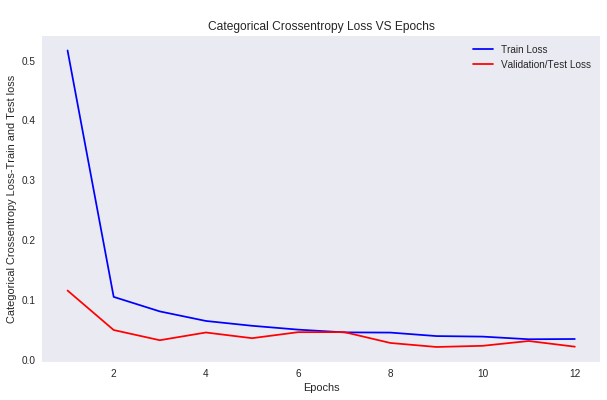

In [0]:
# Evaluating the model on test data
score_2 = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_2[0]) 
print('Test accuracy:', score_2[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, epochs+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
vy = history.history['val_loss']

# Training loss
ty = history.history['loss']
# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

#### Observation:-
In this plot both Train and Test loss are significantly reducing/converging and there is no divergence / increasing between them . This means model is working well without overfitting .

## 3.3 Plotting Violin plots of hidden and output layers to see weights distribution

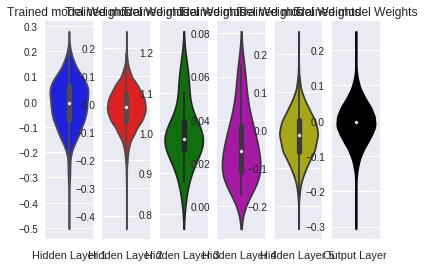

In [0]:
import seaborn as sns

w_after = model_2.get_weights()

# weights of convolution layer 1
c1_w = w_after[0].flatten().reshape(-1,1)
# weights of convolution layer 2
c2_w = w_after[2].flatten().reshape(-1,1)
# weights of convolution layer 3
c3_w = w_after[4].flatten().reshape(-1,1)
# weights of convolution layer 4
c4_w = w_after[6].flatten().reshape(-1,1)
# weights of convolution layer 5
c5_w = w_after[8].flatten().reshape(-1,1)

# weights of output layer
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained\n")

# Hidden layer 1
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c1_w,color='b')
plt.xlabel('Hidden Layer 1')

# Hidden layer 2
plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

# Hidden layer 3
plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

# Hidden layer 4
plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c4_w, color='m')
plt.xlabel('Hidden Layer 4 ')

# Hidden layer 5
plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c5_w, color='y')
plt.xlabel('Hidden Layer 5 ')

# Output layer
plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='k')
plt.xlabel('Output Layer ')
plt.show()

# 4.  CNN with 7 Convolution layers with Kernel size of 3X3


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# start building a model
# Initializing the sequential model as the layers are in sequential 

model_3 = Sequential()   

# Adding first Convolution layer
model_3.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))

# Adding second Convolution layer
model_3.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
# Adding Batch Normalization
model_3.add(BatchNormalization())
# Adding Maxpooling layer 
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
# Adding Dropout 
model_3.add(Dropout(0.25))

# Adding third Convolution layer
model_3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Adding fourth Convolution layer
model_3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Adding Batch Normalization
model_3.add(BatchNormalization())
# Adding Maxpooling layer 
model_3.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout 
model_3.add(Dropout(0.25))


# Adding fifth Convolution layer
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Adding Maxpooling layer 
model_3.add(MaxPooling2D(pool_size=(2, 2)))
# Adding Dropout 
model_3.add(Dropout(0.25))

# Adding sixth Convolution layer
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Adding Batch Normalization
model_3.add(BatchNormalization())
# Adding Maxpooling layer 
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
# Adding Dropout 
model_3.add(Dropout(0.25))

# Adding seventh Convolution layer
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Adding Maxpooling layer 
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
# Adding Dropout 
model_3.add(Dropout(0.25))

# Adding flatten layer
model_3.add(Flatten())
# Adding a dense layer
model_3.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_3.add(BatchNormalization())
# Adding Dropout 
model_3.add(Dropout(0.5))

# Adding a dense layer
model_3.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding Dropout 
model_3.add(Dropout(0.5))


# Output softmax layer
model_3.add(Dense(num_classes, activation='softmax'))

# Printing model summary
model_3.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_385 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_386 (Conv2D)          (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_190 (Bat (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_345 (MaxPoolin (None, 27, 27, 16)        0         
_________________________________________________________________
dropout_364 (Dropout)        (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_387 (Conv2D)          (None, 27, 27, 32)        4640      
_________________________________________________________________
conv2d_388 (Conv2D)          (None, 27, 27, 32)        9248      
__________

## 4.1 Compiling the model

In [0]:
# Compiling the model 
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
# To fit the model, give input data, batch_size, number of epochs and validation/test data
history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 34s 560us/step - loss: 0.9147 - acc: 0.7261 - val_loss: 0.0885 - val_acc: 0.9715
Epoch 2/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.1660 - acc: 0.9536 - val_loss: 0.0521 - val_acc: 0.9836
Epoch 3/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.1141 - acc: 0.9685 - val_loss: 0.0511 - val_acc: 0.9863
Epoch 4/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.0871 - acc: 0.9765 - val_loss: 0.0383 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.0720 - acc: 0.9806 - val_loss: 0.0522 - val_acc: 0.9830
Epoch 6/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.0652 - acc: 0.9829 - val_loss: 0.0376 - val_acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.0588 - acc: 0.9844 - val_loss: 0.

## 4.2 Plotting the Loss vs Epoch values

Test score: 0.02432433779832136
Test accuracy: 0.9932


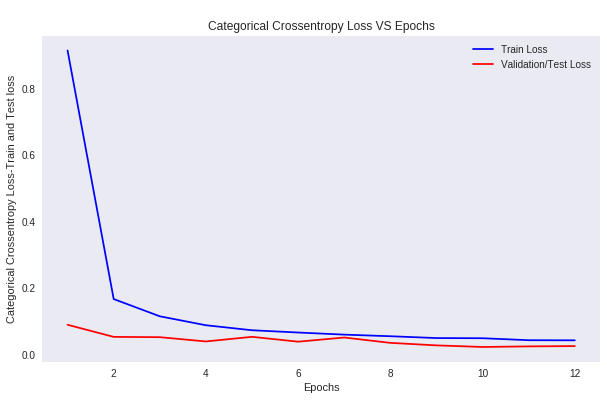

In [0]:
# Evaluating the model on test data
score_3 = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_3[0]) 
print('Test accuracy:', score_3[1])

# Plotting the results
# list of epoch numbers
x = list(range(1, epochs+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
vy = history.history['val_loss']

# Training loss
ty = history.history['loss']
# calling the dynamic function to draw the plot
plt_dynamic(x, vy, ty)

#### Observation:- 
In this plot both Train and Test loss are significantly reducing/converging and there is no divergence / increasing between them . This means model is working well without overfitting .

## 4.3 Plotting Violin plots of hidden and output layers to see weights distribution

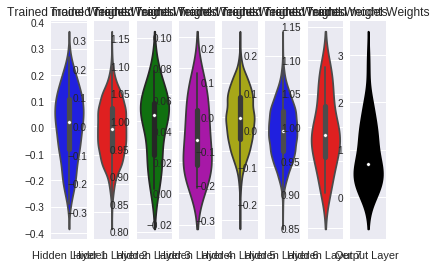

In [130]:
import seaborn as sns

w_after = model_3.get_weights()

# weights of convolution layer 1
c1_w = w_after[0].flatten().reshape(-1,1)
# weights of convolution layer 2
c2_w = w_after[2].flatten().reshape(-1,1)
# weights of convolution layer 3
c3_w = w_after[4].flatten().reshape(-1,1)
# weights of convolution layer 4
c4_w = w_after[6].flatten().reshape(-1,1)
# weights of convolution layer 5
c5_w = w_after[8].flatten().reshape(-1,1)
# weights of convolution layer 6
c6_w = w_after[10].flatten().reshape(-1,1)
# weights of convolution layer 7
c7_w = w_after[12].flatten().reshape(-1,1)

# weights of output layer
out_w = w_after[14].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained\n")

# Hidden layer 1
plt.subplot(1, 8, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c1_w,color='b')
plt.xlabel('Hidden Layer 1')

# Hidden layer 2
plt.subplot(1, 8, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

# Hidden layer 3
plt.subplot(1, 8, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

# Hidden layer 4
plt.subplot(1, 8, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c4_w, color='m')
plt.xlabel('Hidden Layer 4 ')

# Hidden layer 5
plt.subplot(1, 8, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c5_w, color='y')
plt.xlabel('Hidden Layer 5 ')

# Hidden layer 6
plt.subplot(1, 8, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c6_w, color='b')
plt.xlabel('Hidden Layer 6 ')

# Hidden layer 7
plt.subplot(1, 8, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c7_w, color='r')
plt.xlabel('Hidden Layer 7 ')


# Output layer
plt.subplot(1, 8, 8)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='k')
plt.xlabel('Output Layer ')
plt.show()

# 5. Models Summarization

In [0]:
from pandas import DataFrame
CNN = {'CNN Model':['3-Conv layers','5-Conv layers','7-Conv layers'], 'Kernel size':['2X2','5X5','3X3'],
             'Activation':['ReLU','ReLU','ReLU'],'Optimizer':['Adam','Adam','Adam'],
             'Kernel_initializer':['he_normal','he_normal','he_normal'], 'output layer':['softmax','softmax','softmax'],
             'Training accuracy':['0.980','0.990','0.98'], 'Train loss':['0.05','0.03','0.04'],
             'Test accuracy':['0.988','0.994','0.99'], 'Test loss':['0.03','0.02','0.02']}

In [132]:
Final_conclusions = DataFrame(CNN)
Final_conclusions

,Activation,CNN Model,Kernel size,Kernel_initializer,Optimizer,Test accuracy,Test loss,Train loss,Training accuracy,output layer
0,ReLU,3-Conv layers,2X2,he_normal,Adam,0.988,0.03,0.05,0.980,softmax
1,ReLU,5-Conv layers,5X5,he_normal,Adam,0.994,0.02,0.03,0.990,softmax
2,ReLU,7-Conv layers,3X3,he_normal,Adam,0.99,0.02,0.04,0.98,softmax


# 6. Conclusions:-

From the above observations we can observe,

1. As I had used ReLU activation and Adam optimizer, all the accuracies are good.
2. Output layer is softmax layer.
3. As I added dropout, Batch normalization, max-pooling, padding, all the accuracies are good.
4. Test accuracy is little more than Train accuracy in all models, so the model is working well.
5. Test loss is less than train loss for every model.
6. In the Categorical Crossentropy Loss VS Epochs plot, train and test loss also converged or decreased gradually , there is no overfitting.
7. I have used he_normal as kernel initializer as it have inbuilt mean and std values, without need of defing them explicitly. 